In [1]:
import pyedflib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.fftpack import rfft, irfft, fftfreq
import os
 
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV

%matplotlib inline

In [2]:
HOME = "/Users/jonat/OneDrive/Documents/Protocolo_PKS/Protocolo_PKS/dados_edf/DB_REPO/edf/"
def dadosPK(tipo):
    dir_ct = HOME+tipo+"/"
    return os.listdir(HOME+tipo+"/")

In [3]:
def carregarDataFrame(tipo, caminho):
    caminho = HOME+tipo+"/"+caminho
    
    edf = pyedflib.EdfReader(caminho)
    n = edf.signals_in_file
    sigbufs = np.zeros((n, edf.getNSamples()[0]))
    for i in np.arange(n):
         sigbufs[i, :] = edf.readSignal(i)
    edf._close()
    del edf

    return pd.DataFrame(data=sigbufs.T, columns=['ch1', 'ch2', 'ch3', 'ch4'])

In [4]:
def fft(df, canal):
    amostras = int(df[canal][2000:11000].shape[0]*500/2000)
    sinal = np.abs(np.fft.fft(df[canal][2000:11000]))[:amostras]
    freq = np.linspace(0,500,amostras)
    
    return (sinal,freq)

def plotarFFT(a, b, titulo):
    plt.title(titulo)
    plt.plot(b,a)
    plt.xlim([0,500])
    plt.ylim([0,5000])
    plt.show

In [5]:
def frequecia(df, canal):
    sinalFFT = [fft(data, canal)[0] for data in df]

    return sinalFFT

In [6]:
parkinson = dadosPK('parkinson')
controle = dadosPK('controle')
df_ct = [ carregarDataFrame('controle', nome) for nome in controle]
df_pk = [ carregarDataFrame('parkinson', nome) for nome in parkinson]

In [7]:
X_train = df_ct[0]['ch1']

In [8]:
def plotar(X_train):
    fig = plt.figure()
    plt.plot(X_train)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    fig_name = 'fig2.png'
    fig.set_size_inches(w=25,h=5)

In [9]:
def comparar(emg1, emg2):
    # plot comparison of unfiltered vs filtered mean-corrected EMG
    fig = plt.figure()
    plt.subplot(1, 2, 1)
    plt.subplot(1, 2, 1).set_title('Unfiltered EMG')
    plt.plot(emg1)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')

    plt.subplot(1, 2, 2)
    plt.subplot(1, 2, 2).set_title('Filtered EMG')
    plt.plot(emg2)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')

    fig.tight_layout()
    fig_name = 'fig2.png'
    fig.set_size_inches(w=20,h=5)
    fig.savefig(fig_name)
    plt.show()

In [10]:
def comparar3(emg1, emg2, emg3):
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 3, 1)
    plt.subplot(1, 3, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(emg1)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 3, 2)
    plt.subplot(1, 3, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(emg2)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 3, 3)
    plt.subplot(1, 3, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: low_pass' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(emg3)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.plot([0.9, 1.0], [1.0, 1.0], 'r-', lw=5)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=20,h=3)
    fig.savefig(fig_name)

# Remove mean EMG


In [11]:
# process EMG signal: remove mean
emg_correctmean = X_train - np.mean(X_train)

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


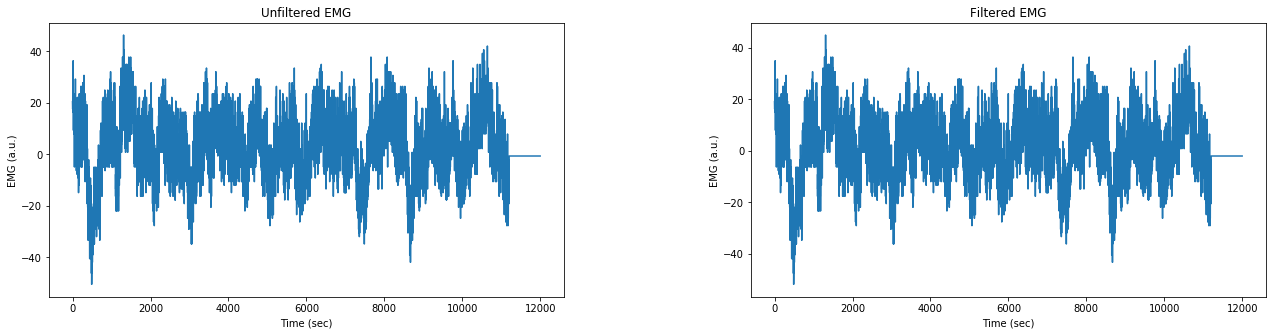

In [12]:
# plot comparison of EMG with offset vs mean-corrected values
comparar(X_train, emg_correctmean)


In [13]:
def bandpass_filter(emg, high_banda=20, low_banda=450):
    # create bandpass filter for EMG
    high = high_banda/(2000/2)
    low = low_banda/(2000/2)
    b, a = sp.signal.butter(4, [high,low], btype='bandpass')

    # process EMG signal: filter EMG
    return sp.signal.filtfilt(b, a, emg)

# sinal de EMG do filtro

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


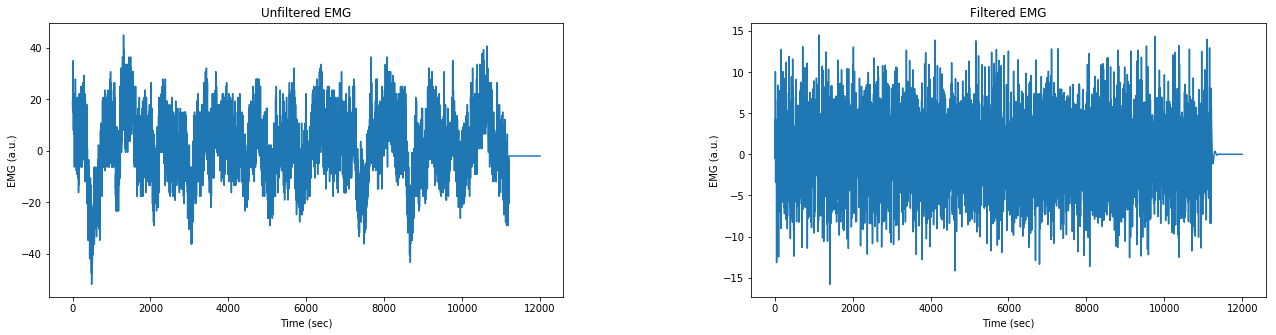

In [14]:
import scipy as sp
from scipy import signal

emg_filtered = bandpass_filter(emg_correctmean, high_banda=20, low_banda=450)

# plot comparison of unfiltered vs filtered mean-corrected EMG
comparar(emg_correctmean, emg_filtered)

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


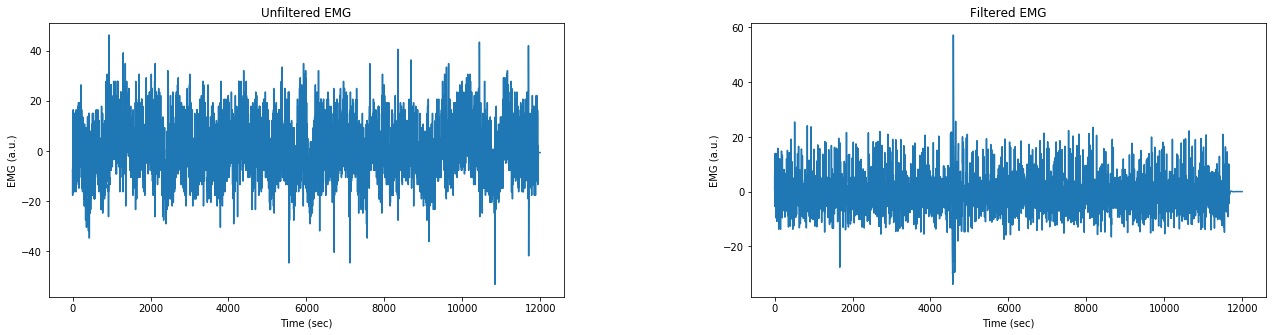

In [15]:
emg_filtered2 = bandpass_filter(df_pk[1]['ch1'], high_banda=20, low_banda=450)

# plot comparison of unfiltered vs filtered mean-corrected EMG
comparar(df_pk[10]['ch1'], emg_filtered2)

# Retificar o sinal EMG

In [16]:
emg_rectified1 = abs(emg_filtered)
emg_rectified2 = abs(emg_filtered2)

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


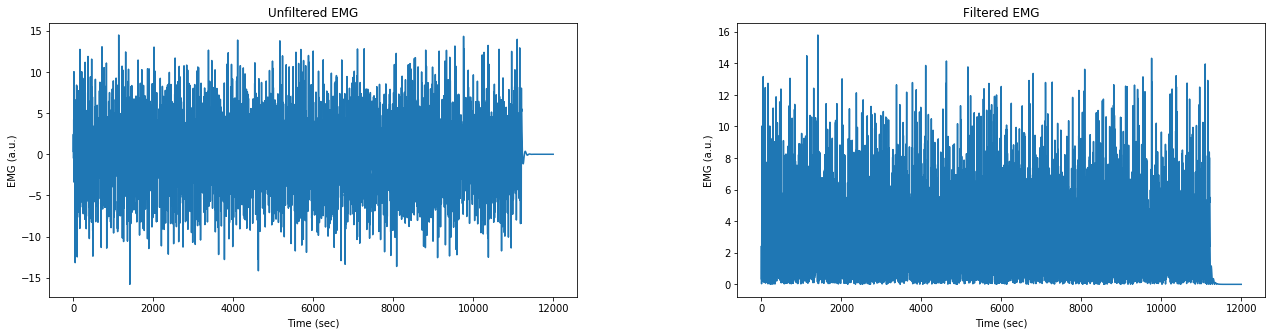

In [17]:
comparar(emg_filtered, emg_rectified1)

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


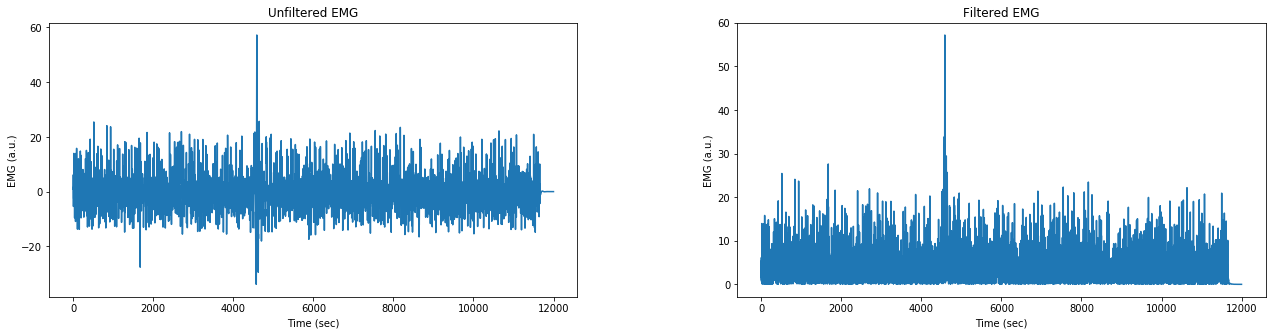

In [18]:
comparar(emg_filtered2, emg_rectified2)

In [19]:
def filtrarEmg(emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    emg = emg[2000:11000]
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    return sp.signal.filtfilt(b2, a2, emg_rectified)

In [20]:
def filteremg(emg, low_pass=10, sfreq=1000, high_band=20, low_band=450):
    """
    time: Time data
    emg: EMG data
    high: high-pass cut off frequency
    low: low-pass cut off frequency
    sfreq: sampling frequency
    """
    emg = emg[2000:11000]
    # normalise cut-off frequencies to sampling frequency
    high_band = high_band/(sfreq/2)
    low_band = low_band/(sfreq/2)
    
    # create bandpass filter for EMG
    b1, a1 = sp.signal.butter(4, [high_band,low_band], btype='bandpass')
    
    # process EMG signal: filter EMG
    emg_filtered = sp.signal.filtfilt(b1, a1, emg)    
    
    # process EMG signal: rectify
    emg_rectified = abs(emg_filtered)
    
    # create lowpass filter and apply to rectified signal to get EMG envelope
    low_pass = low_pass/sfreq
    b2, a2 = sp.signal.butter(4, low_pass, btype='lowpass')
    emg_envelope = sp.signal.filtfilt(b2, a2, emg_rectified)
    
    # plot graphs
    fig = plt.figure()
    plt.subplot(1, 4, 1)
    plt.subplot(1, 4, 1).set_title('Unfiltered,' + '\n' + 'unrectified EMG')
    plt.plot(emg)
    plt.xlabel('Time (sec)')
    plt.ylabel('EMG (a.u.)')
    
    plt.subplot(1, 4, 2)
    plt.subplot(1, 4, 2).set_title('Filtered,' + '\n' + 'rectified EMG: ' + str(int(high_band*sfreq)) + '-' + str(int(low_band*sfreq)) + 'Hz')
    plt.plot(emg_rectified)
    plt.locator_params(axis='x', nbins=4)
    plt.locator_params(axis='y', nbins=4)
    plt.xlabel('Time (sec)')

    plt.subplot(1, 4, 3)
    plt.subplot(1, 4, 3).set_title('Filtered, rectified ' + '\n' + 'EMG envelope: ' + str(int(low_pass*sfreq)) + ' Hz')
    plt.plot(emg_envelope)
    plt.xlabel('Time (sec)')

    fig_name = 'fig_' + str(int(low_pass*sfreq)) + '.png'
    fig.set_size_inches(w=25,h=4)
    fig.savefig(fig_name)

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


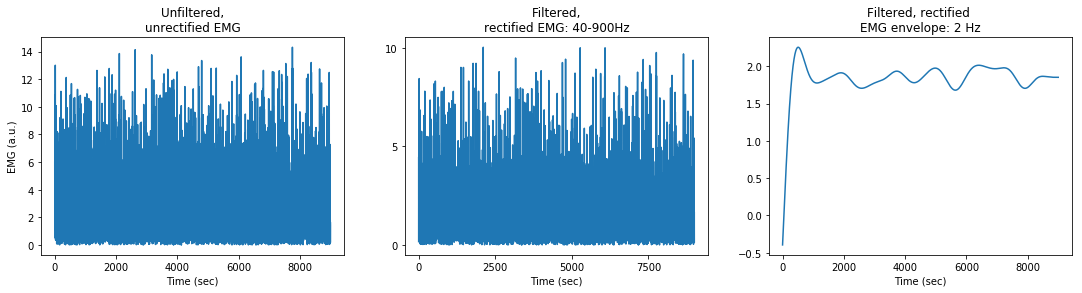

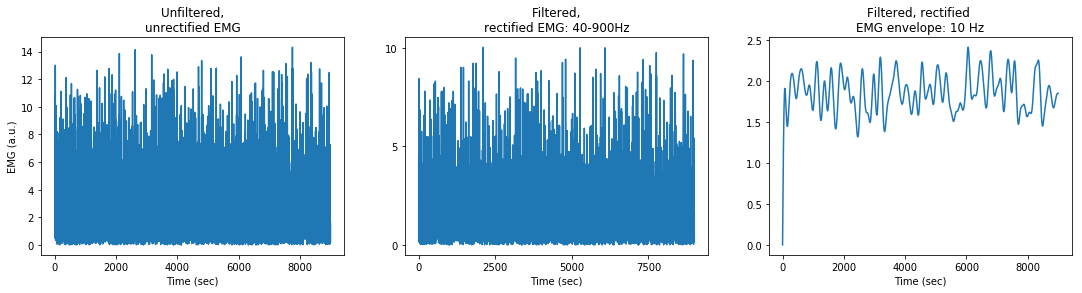

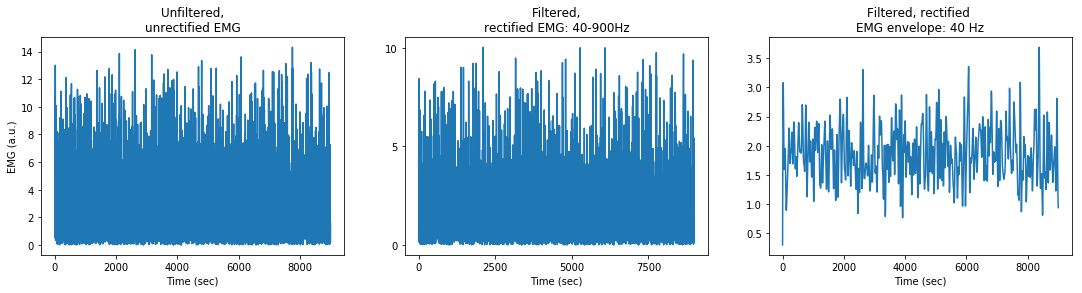

In [21]:
# show what different low pass filter cut-offs do
for i in [2, 10, 40]:
    filteremg( emg_rectified1, low_pass=i)

C:\Users\jonat\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


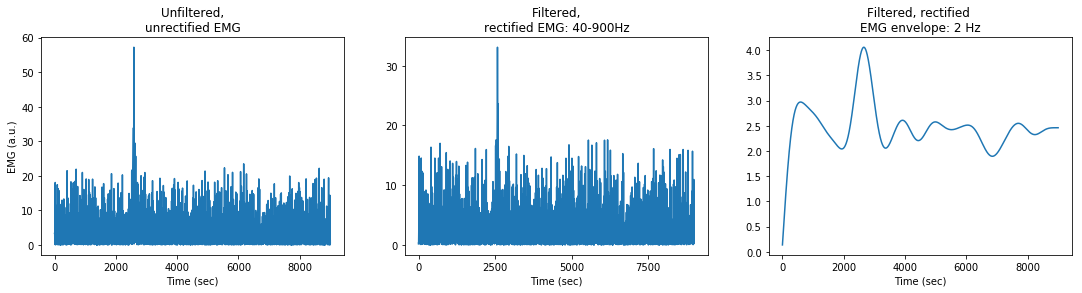

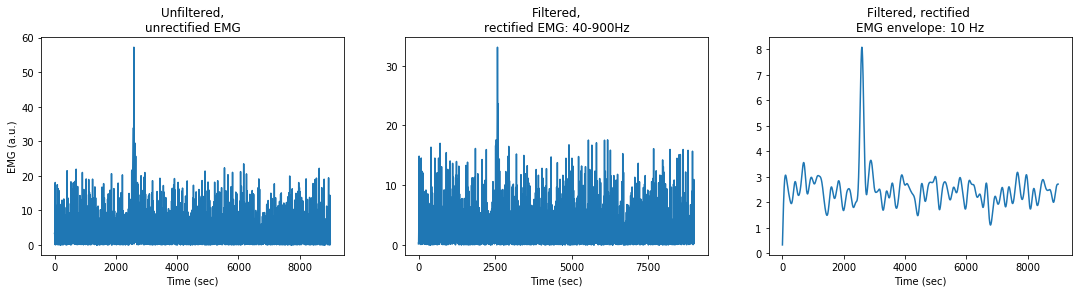

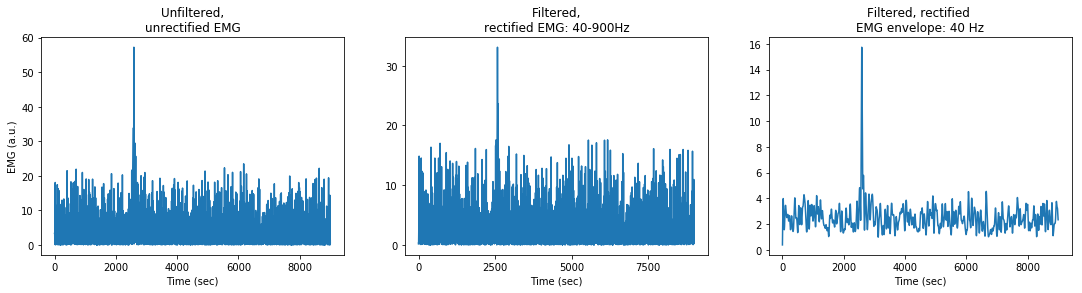

In [22]:
# show what different low pass filter cut-offs do
for i in [2, 10, 40]:
    filteremg( emg_rectified2, low_pass=i)

# Treinando

In [23]:
sinalCT = [np.array(filtrarEmg(ct['ch1'])) for ct in df_ct]
sinalPK = [np.array(filtrarEmg(pk['ch1'])) for pk in df_pk]

In [24]:
rotulosCT = [0 for _ in sinalCT]
rotulosPK = [1 for _ in sinalPK]

In [25]:
trainData = sinalCT + sinalPK
rotulos = rotulosCT + rotulosPK

In [26]:
X_train, X_test, y_train, y_teste = train_test_split(trainData, rotulos, test_size=0.3)

In [27]:
param_grid = {'C':[0.1, 0.01, 1], 
              'degree':[3,4], 
              'gamma':[1,0.1,0.01,0.001], 
              'kernel':['poly', 'rbf', 'sigmoid']}

In [28]:
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [29]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=0.55, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=0.47368421052631576, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=poly ...........................
[CV]  C=0.1, degree=3, gamma=1, kernel=poly, score=0.5789473684210527, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV] . C=0.1, degree=3, gamma=1, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=3, gamma=1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.55, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=sigmoid ........................
[CV]  C=0.1, degree=3, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=poly, score=0.55, total=   0.0s
[CV] C=0.1, degree=3, gamma=0.1, kernel=poly .........................
[CV]  C=0.1, degree=3, gamma=0.1, kernel=poly, score=0.47368421052631576, total=   

[CV]  C=0.1, degree=4, gamma=0.01, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.55, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.01, kernel=sigmoid .....................
[CV]  C=0.1, degree=4, gamma=0.01, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, score=0.55, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, score=0.47368421052631576, total=   0.0s
[CV] C=0.1, degree=4, gamma=0.001, kernel=poly .......................
[CV]  C=0.1, degree=4, gamma=0.001, kernel=poly, score=0.578947

[CV]  C=0.01, degree=4, gamma=1, kernel=sigmoid, score=0.5263157894736842, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=poly, score=0.55, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=poly, score=0.47368421052631576, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=poly ........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=poly, score=0.5789473684210527, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=rbf, score=0.55, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=rbf, score=0.5263157894736842, total=   0.0s
[CV] C=0.01, degree=4, gamma=0.1, kernel=rbf .........................
[CV]  C=0.01, degree=4, gamma=0.1, kernel=rbf, score=0.5263157894736842, t

[CV]  C=1, degree=3, gamma=0.001, kernel=poly, score=0.47368421052631576, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=poly .........................
[CV]  C=1, degree=3, gamma=0.001, kernel=poly, score=0.5789473684210527, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=3, gamma=0.001, kernel=rbf, score=0.7, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=3, gamma=0.001, kernel=rbf, score=0.6842105263157895, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=3, gamma=0.001, kernel=rbf, score=0.6842105263157895, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.55, total=   0.0s
[CV] C=1, degree=3, gamma=0.001, kernel=sigmoid ......................
[CV]  C=1, degree=3, gamma=0.001, kernel=sigmoid, score=0.5263157894736842, tota

[Parallel(n_jobs=1)]: Done 216 out of 216 | elapsed:    9.3s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 0.01, 1], 'degree': [3, 4], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['poly', 'rbf', 'sigmoid']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [30]:
grid.best_params_

{'C': 1, 'degree': 3, 'gamma': 0.001, 'kernel': 'rbf'}

In [31]:
y_pred = grid.predict(X_test)

In [32]:
nomes = ['parkinson', 'controle']
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão sobre diabetes',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Esperado')
    plt.xlabel('Obtido')

<Figure size 432x288 with 0 Axes>

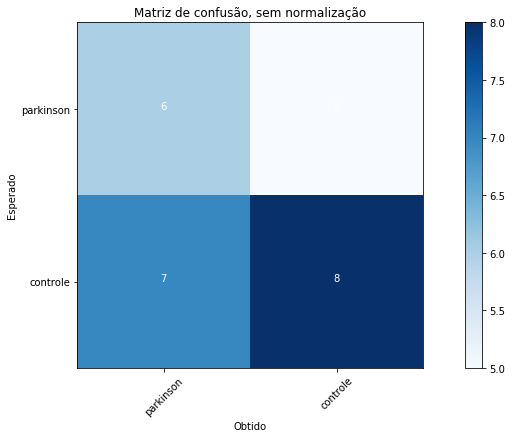

In [33]:
# Matriz de confusão

cnf_matrix = confusion_matrix(y_teste, y_pred )
np.set_printoptions(precision=2)
# Sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')

In [34]:
print(classification_report(y_pred, y_teste))

             precision    recall  f1-score   support

          0       0.55      0.46      0.50        13
          1       0.53      0.62      0.57        13

avg / total       0.54      0.54      0.54        26

